<a href="https://colab.research.google.com/github/Sj-kronton/Fotos_AI/blob/main/K-vecinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Algoritmo de proximidad de vecinos: K-vecinos mas cercanos

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

creditos= pd.read_csv('creditos.csv')
creditos.head()

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0


In [7]:
buenos=creditos[creditos["cumplio"]==1]
malos=creditos[creditos["cumplio"]==0]
buenos, malos

(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

##analizar datos con grafica

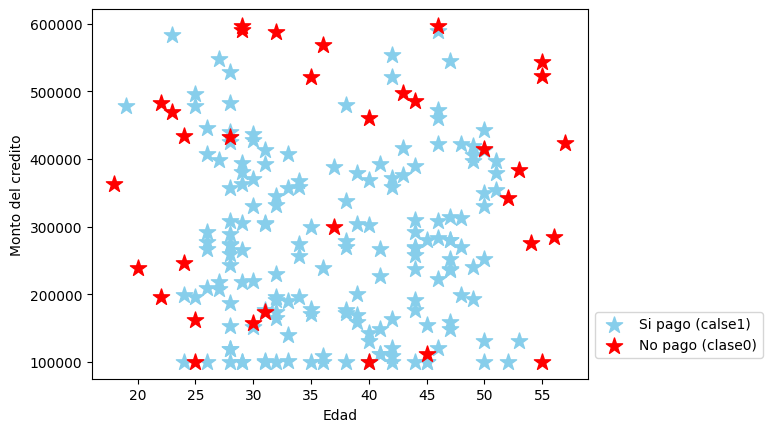

In [8]:
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase0)")

plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

In [9]:
datos= creditos[["edad", "credito"]]
clase= creditos["cumplio"]

escalador= preprocessing.MinMaxScaler()

datos= escalador.fit_transform(datos)
datos
#las edades se organizan en porcentaje de 100%, repartiendose entre 0 y 1,
#de forma que 18 años es el minimo y es 0

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

##creacion modelo de clasificacion por vecinos

In [10]:
clasificador= KNeighborsClassifier(n_neighbors=3)#vecinos a tomar en cuenta, por ahora 3
clasificador.fit(datos, clase)
#aqui se cambia luego a por ejecplo raiz cuadrada de total de datos (200)


KNeighborsClassifier(n_neighbors=3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase  [1]
Probabilidades con clase  [[0. 1.]]


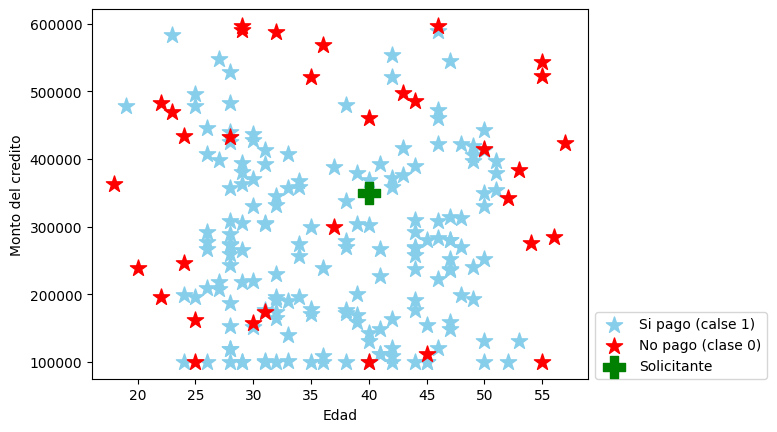

In [15]:
edad=40 #datos artificial para probar el modelo
monto=350000

#escalar datos del nuevo solicitante
solicitante=escalador.transform([[edad, monto]])
print("Clase ", clasificador.predict(solicitante))
print("Probabilidades con clase ", clasificador.predict_proba(solicitante))#calcular clase y probabilidades

#codigo para graficar

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase 0)")

plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

##Regiones de las clases

Pagadores vs deudores

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


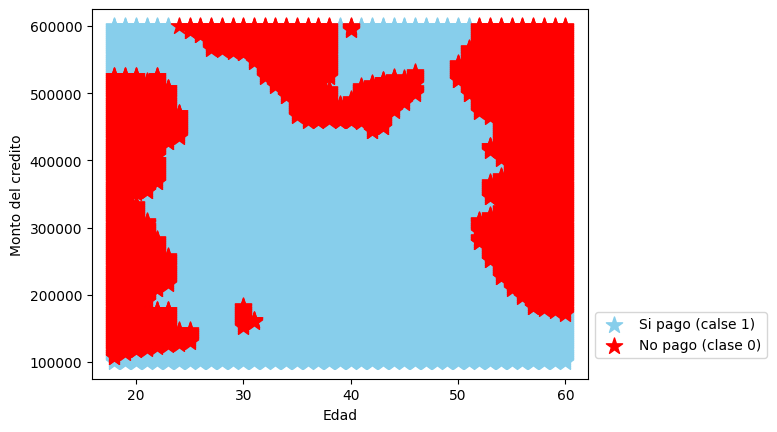

In [22]:
#Datos sinteticos de todos los posibles solicitantes
cliente=np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades=np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos=pd.DataFrame(np.stack((edades,cliente), axis=2)[0],
                   columns=["edad", "credito"])

#Escalar los datos
solicitantes=escalador.transform(todos.values)

#predecir todas las clases
clases_resultantes=clasificador.predict(solicitantes)

#Codigo para graficar

buenos=todos[clases_resultantes==1]
malos=todos[clases_resultantes==0]

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Si pago (calse 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pago (clase 0)")

plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()